In [2]:
##################################################################
##
## I. définir le dossier de travail, import des librairies (packages)
##                  lecture et chargement des données
##
##################################################################

### Se positionner dans le répertoire des données ###
## vous changer le 'work directory' dans RStudio via le menu
getwd()
setwd('../BData') ## A adapter en fonction de la localisation du dossier
### chargement des paquets R pour lire et manipuler les données spatiales 
library(sf) ## lecture et écriture de données vecteurs 
##library(rgdal) ## lecture de données vecteurs

[1] "/home/thierry/works/R4R2D2C_2023_2024/R4R2D2C_2023_2024/RCode"

Linking to GEOS 3.12.0, GDAL 3.7.1, PROJ 9.3.0; sf_use_s2() is TRUE



In [3]:
dir() ## affiche le contenu du dossier de travail ici la dossier BData

[1] "ptsampleFenayL93_Practices_&_Microbes.cpg"
 [2] "ptsampleFenayL93_Practices_&_Microbes.dbf"
 [3] "ptsampleFenayL93_Practices_&_Microbes.prj"
 [4] "ptsampleFenayL93_Practices_&_Microbes.qmd"
 [5] "ptsampleFenayL93_Practices_&_Microbes.shp"
 [6] "ptsampleFenayL93_Practices_&_Microbes.shx"
 [7] "ptsampleFenayL93_Soil_NG.cpg"             
 [8] "ptsampleFenayL93_Soil_NG.dbf"             
 [9] "ptsampleFenayL93_Soil_NG.prj"             
[10] "ptsampleFenayL93_Soil.cpg"                
[11] "ptsampleFenayL93_Soil.dbf"                
[12] "ptsampleFenayL93_Soil.prj"                
[13] "ptsampleFenayL93_Soil.qmd"                
[14] "ptsampleFenayL93_Soil.shp"                
[15] "ptsampleFenayL93_Soil.shx"

In [4]:
##########################################################################
## Charge l'ensemble des pts echantillonnes sur la zone atelier de Fenay
## utilisation de la fonction st_read du package sf
## pour lister l'ensemble des fonctions du package sf: help(package = "sf")

## ?st_read ## pour afficher l'aide sur la function supprimer le commentaire ##

mydata <- st_read("ptsampleFenayL93_Soil.shp") ## Lecture et chargement des données
mydata_microbes <- st_read("ptsampleFenayL93_Practices_&_Microbes.shp") ## Lecture et chargement des données
ls()
## mydata <- readOGR("ptsampleFenayL93.shp")
## affiche le header des données

Reading layer `ptsampleFenayL93_Soil' from data source 
  `/home/thierry/works/R4R2D2C_2023_2024/R4R2D2C_2023_2024/BData/ptsampleFenayL93_Soil.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 269 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 853766.6 ymin: 6681507 xmax: 858712.6 ymax: 6684948
Projected CRS: RGF93 v1 / Lambert-93
Reading layer `ptsampleFenayL93_Practices_&_Microbes' from data source 
  `/home/thierry/works/R4R2D2C_2023_2024/R4R2D2C_2023_2024/BData/ptsampleFenayL93_Practices_&_Microbes.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 269 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 853766.6 ymin: 6681507 xmax: 858712.6 ymax: 6684948
Projected CRS: RGF93 v1 / Lambert-93


[1] "mydata"          "mydata_microbes"

In [5]:
###################################################################
## Type (i.e. classe), dimension et structure des données
##################################################################

## type de l'objet mydata
class(mydata)
dim(mydata)

[1] "sf"         "data.frame"

[1] 269  11

In [6]:
## structure de l'objet mydata
str(mydata)

Classes ‘sf’ and 'data.frame':	269 obs. of  11 variables:
 $ field_1 : chr  "Py_1_2011" "Py_100_2011" "Py_101_2011" "Py_102_2011" ...
 $ annee   : num  2011 2011 2011 2011 2011 ...
 $ SOC     : num  35 24.5 23 19.8 45.2 10.3 33.2 11 10.4 37.6 ...
 $ TN      : num  3.07 2.42 2.43 2.1 3.75 5.92 3.14 1.06 0.999 3.25 ...
 $ C_N     : num  11.4 10.1 9.48 9.44 12 1.74 10.6 10.4 10.4 11.6 ...
 $ PH      : num  6.78 8.1 7.5 7.51 8.06 8.25 8.2 6.78 7.75 8.13 ...
 $ Clay    : num  44.2 34.3 42 40.3 33 31 21.4 27.3 24.3 23.2 ...
 $ Sand    : num  4.5 15 8 11.6 10.1 5.6 14.4 7.9 6.5 11.8 ...
 $ XLB93   : num  857059 854843 858498 858283 855273 ...
 $ YLB93   : num  6684437 6682797 6682798 6682798 6682798 ...
 $ geometry:sfc_POINT of length 269; first list element:  'XY' num  857059 6684437
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA NA NA NA NA NA NA
  ..- attr(*, "names")= chr [1:10] "field_1" "annee" "SOC" "TN" ...


In [7]:
## résumé des différents champs
summary(mydata)

   field_1              annee           SOC              TN        
 Length:269         Min.   :2011   Min.   : 9.50   Min.   : 0.835  
 Class :character   1st Qu.:2011   1st Qu.:13.60   1st Qu.: 1.320  
 Mode  :character   Median :2011   Median :17.10   Median : 1.610  
                    Mean   :2011   Mean   :21.39   Mean   : 2.034  
                    3rd Qu.:2011   3rd Qu.:23.00   3rd Qu.: 2.220  
                    Max.   :2011   Max.   :88.60   Max.   :14.600  
      C_N              PH             Clay           Sand       
 Min.   : 1.22   Min.   :4.740   Min.   : 8.0   Min.   : 2.000  
 1st Qu.:10.00   1st Qu.:7.370   1st Qu.:27.2   1st Qu.: 5.800  
 Median :10.40   Median :7.960   Median :34.3   Median : 7.400  
 Mean   :10.68   Mean   :7.687   Mean   :33.3   Mean   : 8.817  
 3rd Qu.:11.00   3rd Qu.:8.200   3rd Qu.:39.8   3rd Qu.:10.000  
 Max.   :22.20   Max.   :8.420   Max.   :61.7   Max.   :29.300  
     XLB93            YLB93                  geometry  
 Min.   :8537

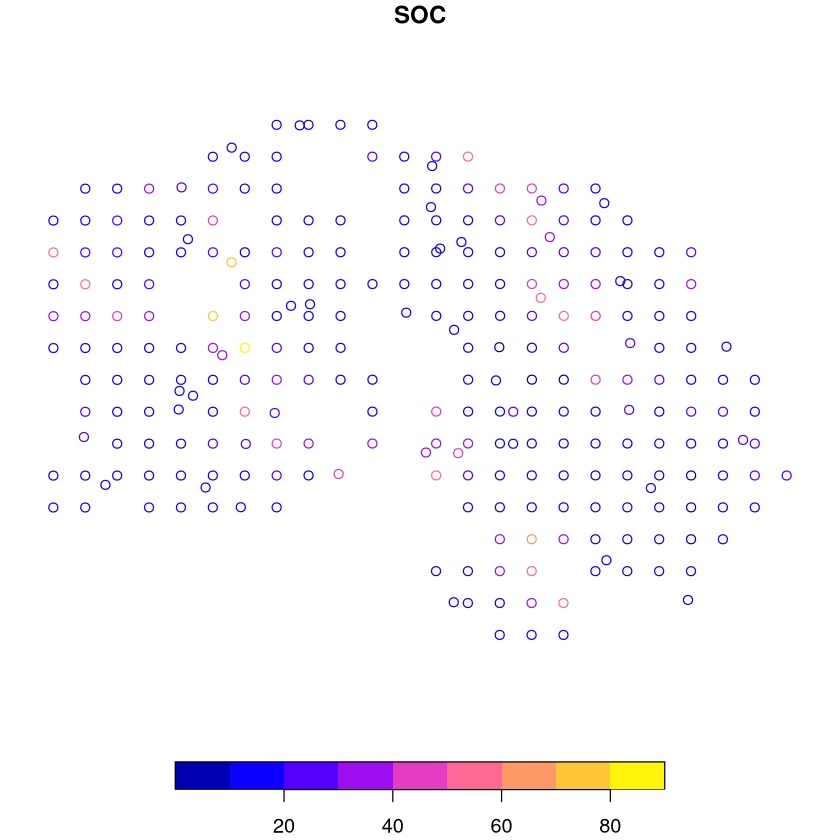

In [8]:
##################################################################
##
## II. Exploration des données :
##       - graphe les données pour la variable SOC (matière organique)
##       - trace l'histogramme pour la variable SOC
##       - Calcul des moments d'ordre 1 : min, max, moyenne, écart-type
##
##################################################################

## Graphe de la variable SOC 
plot(mydata["SOC"])

[1] 9.5

[1] 88.6

[1]  9.5 88.6

[1] 21.38892

[1] 12.85612

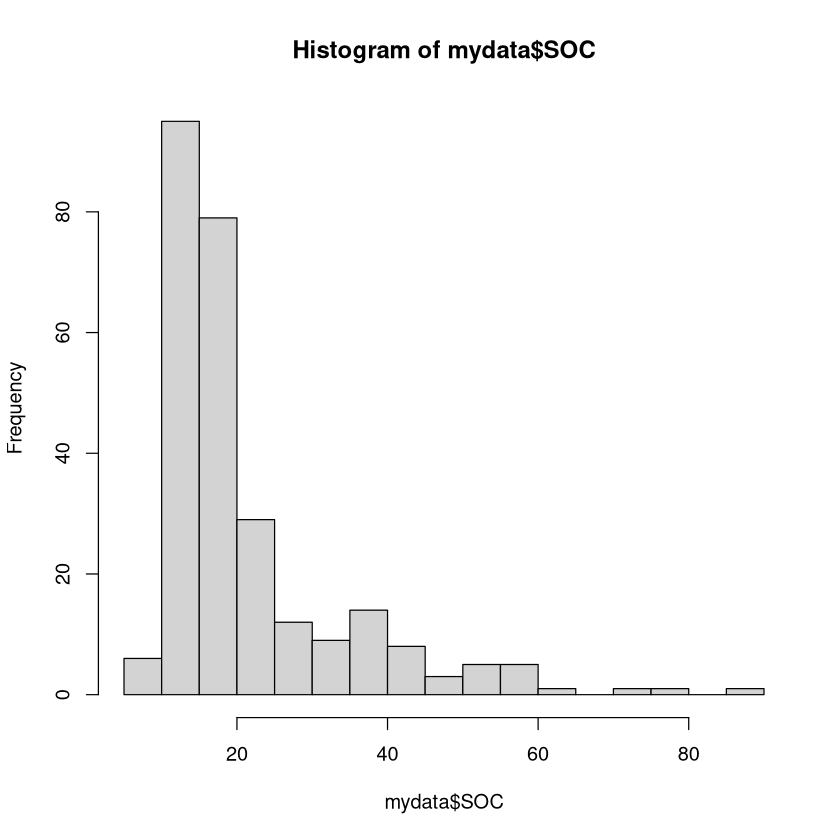

In [9]:
## Histogramme de la variable SOC
hist(mydata$SOC,breaks=20)

## Calcul des moments d'ordre 1 pour la variable SOC: min, max, moyenne, écart-type
min(mydata$SOC);max(mydata$SOC)
range(mydata$SOC)
mean(mydata$SOC);sd(mydata$SOC)


In [10]:
##################################################################
##
## II.BIS Manipulation de tableaux :
##       - Recherche d'expression régulière et remplacement
##       - Jointure de tableaux
##       - Sous-selection de colonnes
##
##       - Filtrage des données (lignes)
##       - Calcul des moments d'ordre 1 : min, max, moyenne, écart-type 
##         et test de comparaison de moyenne
##
##################################################################

library(tidyverse)
library(dplyr)
library(rstatix)## permet de faire l'interface entre tidyverse et certaines fonctions de tests statistiques de base dans R
## aide en ligne: https://rstudio-education.github.io/tidyverse-cookbook/how-to-use-this-book.html

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘rstatix’


L'objet suivant est masqué depuis ‘package:stats’:

    filter




In [11]:
ls() ## liste les objets existants dans la session de travail
head(mydata_microbes)

[1] "mydata"          "mydata_microbes"

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



,field_1,XLB93,YLB93,N_mineral,P,K,Mg_total,S_total,Parcelle_c,Profondeur,Categories,Shannon,Evenness,X1.Simpson,Biomasse,NB_OTUs_BE,geometry
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [m]>
1,Py_1_2011,NA,6684437,0,0.00,0.00,0.00,0.00,Foret,0,pas_de_travail,4.810,0.697131,25.743,230.0,1549,POINT (857058.6 6684437)
2,Py_100_2011,NA,6682797,126,55.25,27.25,0.00,23.25,Ble_tendre_hiver,25,Travail_intermediaire,5.729,0.795924,94.530,100.0,2002,POINT (854842.7 6682797)
3,Py_101_2011,NA,6682798,57,27.00,50.50,1.75,51.00,Tournesol,40,Labour,5.469,0.782461,86.932,69.0,1723,POINT (858497.9 6682798)
4,Py_102_2011,NA,6682798,57,27.00,50.50,1.75,51.00,Tournesol,40,Labour,5.492,0.777978,75.408,6.6,1865,POINT (858283 6682798)
5,Py_103_2011,NA,6682798,91,39.75,29.00,0.00,9.25,Orge_hiver,25,Travail_intermediaire,5.742,0.790177,77.682,90.0,2205,POINT (855273.1 6682798)
6,Py_104_2011,NA,6682798,209,35.75,0.00,5.00,9.75,Ble_tendre_hiver,25,Travail_intermediaire,5.519,0.771110,73.336,37.0,2018,POINT (858068.2 6682798)


In [12]:
## Description et application de l'opérateur %>% ##
## Cet opérateur est associé au package tidyverse

## Recherche d'expression régulière et remplacement/correction d'erreurs de casse
### Objectif: remplacement des détails des cultures par une catégorie plus large dans la cariable Parcelle_c

# Identification du nombre de catégories
  mydata_microbes$Parcelle_c%>%unique()

[1] "Foret"                "Ble_tendre_hiver"     "Tournesol"           
 [4] "Orge_hiver"           "Colza_hiver"          "Moutarde"            
 [7] "Soja"                 "Bandes_enherbees"     "Moutarde_brune"      
[10] "Pois_prot._printemps" "Moutarde_hiver"       "Cassis"              
[13] "Pomme_de_terre"       "Haricots_verts"       "Orge_printemps"      
[16] "Miscanthus"

In [13]:
mydata_microbes<-mydata_microbes %>%
                          mutate_at("Parcelle_c", str_replace, "Ble_tendre_hiver", "Cereale")%>%
                          mutate_at("Parcelle_c", str_replace, "Tournesol", "Oleagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Orge_hiver", "Cereale")%>%
                          mutate_at("Parcelle_c", str_replace, "Colza_hiver", "Oleagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Moutarde", "Oleagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Soja", "Proteagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Bande_enherbees", "Cult_perenne")%>%
                          mutate_at("Parcelle_c", str_replace, "Moutarde_brune", "Oleagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Pois_prot._printemps", "Proteagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Moutarde_hiver", "Oleagineux")%>%
                          mutate_at("Parcelle_c", str_replace, "Cassis", "Petits_fruits")%>%
                          mutate_at("Parcelle_c", str_replace, "Pomme_de_terre", "Maraîchage")%>%
                          mutate_at("Parcelle_c", str_replace, "Haricots_verts", "Maraîchage")%>%
                          mutate_at("Parcelle_c", str_replace, "Orge_printemps", "Cereale")%>%
                          mutate_at("Parcelle_c", str_replace, "Miscanthus", "Cult_perenne")

  mydata_microbes$Parcelle_c%>%unique()

[1] "Foret"            "Cereale"          "Oleagineux"       "Proteagineux"    
 [5] "Bandes_enherbees" "Oleagineux_brune" "Oleagineux_hiver" "Petits_fruits"   
 [9] "Maraîchage"       "Cult_perenne"

In [14]:
## Sous-selection de colonnes
### l'objectif est de pouvoir réduire la taille d'un tableau ou ne faire des opérations que sur les colonnes d'intérêt.
### Ici, on va sous-sélectionner les colonnes uniques du tableau mydata_microbes par rapport au tableau mydata avant 
## de faire une jointure entre les deux tableaux de données.
### Pour cela, on va procéder en excluant les colonnes en double.

    ## Lister les colonnes de mydata et de mydata_microbes
    mydata%>%colnames()  
    mydata_microbes%>%colnames()
    mydata_microbes<- mydata_microbes%>%select(!c("XLB93",  "YLB93", "geometry"))

[1] "field_1"  "annee"    "SOC"      "TN"       "C_N"      "PH"      
 [7] "Clay"     "Sand"     "XLB93"    "YLB93"    "geometry"

[1] "field_1"    "XLB93"      "YLB93"      "N_mineral"  "P"         
 [6] "K"          "Mg_total"   "S_total"    "Parcelle_c" "Profondeur"
[11] "Categories" "Shannon"    "Evenness"   "X1.Simpson" "Biomasse"  
[16] "NB_OTUs_BE" "geometry"

In [15]:
## Jointure de tableaux
### l'objectif est de pouvoir associer deux tableaux sur la base d'une colonne d'identifiants
    
    ### Dans le cas d'un tableau de données simple
    ## Passage des objets de la classe sf et data.frame à la seule classe data.frame
    mydata_df<-mydata%>%as.data.frame()
    mydata_microbes_df<-mydata_microbes%>%as.data.frame()
    
    mydata_df<-inner_join(x = mydata_df, y = mydata_microbes_df)


Joining with `by = join_by(field_1, geometry)`


In [16]:
class(mydata_df)
##head(mydata_df)
dim(mydata_df)

[1] "data.frame"

[1] 269  24

In [17]:
### Dans le cas d'un objet spatial
mydata<-st_join(x = mydata, y = mydata_microbes, by="field_1")

In [18]:
head(mydata)

field_1.x   annee SOC  TN   C_N   PH   Clay Sand XLB93    YLB93  
1 Py_1_2011   2011  35.0 3.07 11.40 6.78 44.2  4.5 857058.6 6684437
2 Py_100_2011 2011  24.5 2.42 10.10 8.10 34.3 15.0 854842.7 6682797
3 Py_101_2011 2011  23.0 2.43  9.48 7.50 42.0  8.0 858497.9 6682798
4 Py_102_2011 2011  19.8 2.10  9.44 7.51 40.3 11.6 858283.0 6682798
5 Py_103_2011 2011  45.2 3.75 12.00 8.06 33.0 10.1 855273.1 6682798
6 Py_104_2011 2011  10.3 5.92  1.74 8.25 31.0  5.6 858068.2 6682798
  geometry                 ⋯ S_total Parcelle_c Profondeur
1 POINT (857058.6 6684437) ⋯  0.00   Foret       0        
2 POINT (854842.7 6682797) ⋯ 23.25   Cereale    25        
3 POINT (858497.9 6682798) ⋯ 51.00   Oleagineux 40        
4 POINT (858283 6682798)   ⋯ 51.00   Oleagineux 40        
5 POINT (855273.1 6682798) ⋯  9.25   Cereale    25        
6 POINT (858068.2 6682798) ⋯  9.75   Cereale    25        
  Categories            Shannon Evenness X1.Simpson Biomasse NB_OTUs_BE
1 pas_de_travail        4.810   0.697131 25.743     230.0    1549      
2 Travail_intermediaire 5.729   0.795924 94.530     100.0    2002      
3 Labour                5.469   0.782461 86.932      69.0    1723      
4 Labour                5.492   0.777978 75.408       6.6    1865      
5 Travail_intermediaire 5.742   0.790177 77.682      90.0    2205      
6 Travail_intermediaire 5.519   0.771110 73.336      37.0    2018      
  geometry                
1 POINT (857058.6 6684437)
2 POINT (854842.7 6682797)
3 POINT (858497.9 6682798)
4 POINT (858283 6682798)  
5 POINT (855273.1 6682798)
6 POINT (858068.2 6682798)

In [19]:
## Sous-échantillonnage des données
### e.g. On souhaite ne sélectionner que les sites de forets et de cereales
TEMP<-mydata_df%>%filter(Parcelle_c %in% c("Foret","Cereale"))
str(TEMP)

'data.frame':	194 obs. of  24 variables:
 $ field_1   : chr  "Py_1_2011" "Py_100_2011" "Py_103_2011" "Py_104_2011" ...
 $ annee     : num  2011 2011 2011 2011 2011 ...
 $ SOC       : num  35 24.5 45.2 10.3 33.2 11 10.4 10.8 14 38.7 ...
 $ TN        : num  3.07 2.42 3.75 5.92 3.14 1.06 0.999 1.06 1.38 3.11 ...
 $ C_N       : num  11.4 10.1 12 1.74 10.6 10.4 10.4 10.1 10.2 12.4 ...
 $ PH        : num  6.78 8.1 8.06 8.25 8.2 6.78 7.75 7.16 8.29 7.23 ...
 $ Clay      : num  44.2 34.3 33 31 21.4 27.3 24.3 22 40 44.5 ...
 $ Sand      : num  4.5 15 10.1 5.6 14.4 7.9 6.5 9.3 9.5 7.2 ...
 $ XLB93     : num  857059 854843 855273 858068 855488 ...
 $ YLB93     : num  6684437 6682797 6682798 6682798 6682798 ...
 $ geometry  :sfc_POINT of length 194; first list element:  'XY' num  857059 6684437
 $ N_mineral : num  0 126 91 209 91 209 209 144 133 0 ...
 $ P         : num  0 55.2 39.8 35.8 39.8 ...
 $ K         : num  0 27.2 29 0 29 ...
 $ Mg_total  : num  0 0 0 5 0 5 5 2.5 0 0 ...
 $ S_total   : nu

In [20]:
## Calcul des moments d'ordre 1 sur le sous-échantillonnage: min, max, moyenne, écart-type 
## et test de comparaison de moyenne
## Calcul des moments d'ordre 1 pour la variable SOC: min, max, moyenne, écart-type
mydata%>%filter(Parcelle_c %in% c("Foret","Cereale"))%>%select(SOC)%>%summary()
    
mydata%>%filter(Parcelle_c %in% c("Foret","Cereale"))%>%kruskal_test(SOC~Parcelle_c)


      SOC                 geometry  
 Min.   : 9.50   POINT        :194  
 1st Qu.:13.60   epsg:2154    :  0  
 Median :17.10   +proj=lcc ...:  0  
 Mean   :22.65                      
 3rd Qu.:25.55                      
 Max.   :88.60                      

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,SOC,194,65.71541,1,5.21e-16,Kruskal-Wallis


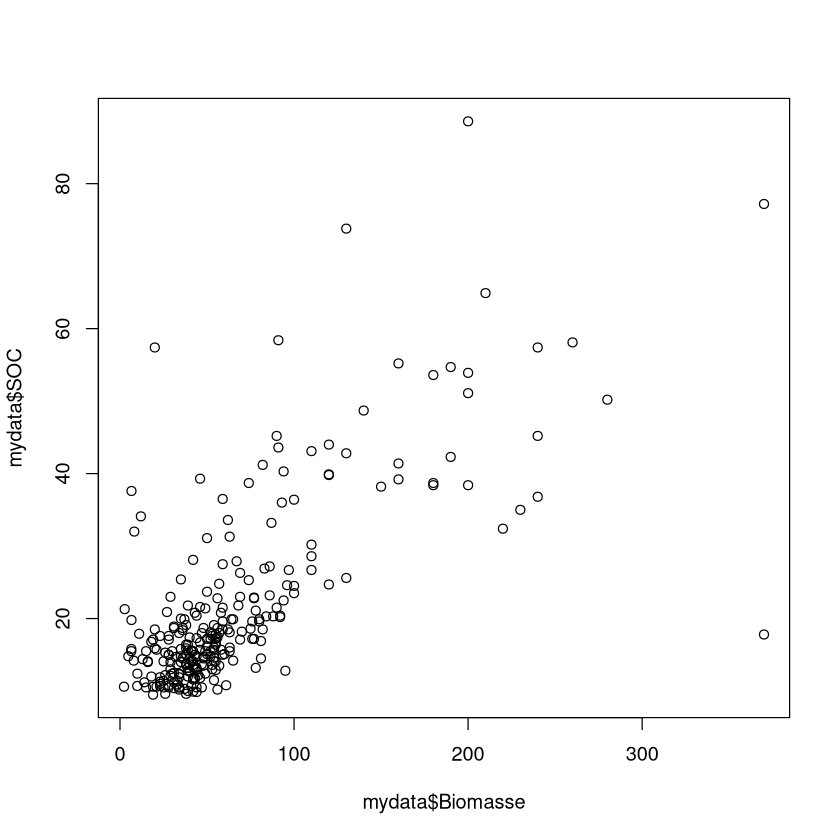

In [21]:
##################################################################
##
## III. Ajustement d'un modèle linéaire simple
##      métrique de la qualité de l'ajustement du modèle : r et R2
##      erreur quadratique moyenne associée à l'ajustement : RMSE
##
##################################################################

## scatterplot de SOC vs. Biomasse
plot(mydata$Biomasse,mydata$SOC)
#plot(mydata[,23],mydata[,3])
## Ajustement d'un modèle linéaire
mylm <- lm(Biomasse~SOC, data = mydata)

In [22]:
## résumé des paramètres et de la qualité de l'ajustement
summary(mylm)

###############################################
## Que déduire de ces résultats ?
## Commentaires ?
###############################################


Call:
lm(formula = Biomasse ~ SOC, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.49  -16.24   -0.87   12.55  316.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.6863     4.6089  -0.583     0.56    
SOC           3.1564     0.1848  17.082   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.89 on 267 degrees of freedom
Multiple R-squared:  0.5222,	Adjusted R-squared:  0.5204 
F-statistic: 291.8 on 1 and 267 DF,  p-value: < 2.2e-16


In [26]:
## Calcule de la RMSE (Root Mean Squared Error) ou Erreur Quadratique Moyenne
RMSE <- sqrt(sum(mylm$residuals^2)/length(mylm$residuals))
RMSE

[1] 38.74444

In [29]:
##################################################################
##
## IIIb. Ajustement d'un modèle linéaire multiple
##      métrique de la qualité de l'ajustement du modèle : r et R2
##      erreur quadratique moyenne associée à l'ajustement : RMSE
##
##################################################################

## prenons par exemple le modèle Biomasse = fn(TN, PH, SOC)
mydfmlm <- lm(Biomasse~PH+SOC+TN, data = mydata)
summary(mydfmlm)


Call:
lm(formula = Biomasse ~ PH + SOC + TN, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-151.799  -15.309   -0.833   13.811  114.901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.8279    22.5567   4.027 7.39e-05 ***
PH          -13.1439     2.9296  -4.487 1.08e-05 ***
SOC           1.4159     0.2483   5.702 3.16e-08 ***
TN           21.9996     2.3638   9.307  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.39 on 265 degrees of freedom
Multiple R-squared:  0.6505,	Adjusted R-squared:  0.6465 
F-statistic: 164.4 on 3 and 265 DF,  p-value: < 2.2e-16


In [30]:
## Calcule de la RMSE (Root Mean Squared Error) ou Erreur Quadratique Moyenne
RMSE <- sqrt(sum(mydfmlm$residuals^2)/length(mydfmlm$residuals))
RMSE

[1] 33.13661

In [33]:
## Qu'en déduisez vous quand au score du modèle multilinéaire comparativement au modèle linéaire simple ?

In [36]:
mydf <- mydata[,c("TN", "PH", "SOC","Biomasse")]
mydf$SOCpredmlm <- predict.lm(mydfmlm, mydf)

In [37]:
head(mydf)

,TN,PH,SOC,Biomasse,geometry,SOCpredmlm
,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [m]>,<dbl>
1,3.07,6.78,35.0,230.0,POINT (857058.6 6684437),118.80603
2,2.42,8.10,24.5,100.0,POINT (854842.7 6682797),72.28993
3,2.43,7.50,23.0,69.0,POINT (858497.9 6682798),78.27247
4,2.10,7.51,19.8,6.6,POINT (858283 6682798),66.35044
5,3.75,8.06,45.2,90.0,POINT (855273.1 6682798),131.38331
6,5.92,8.25,10.3,37.0,POINT (858068.2 6682798),127.21168


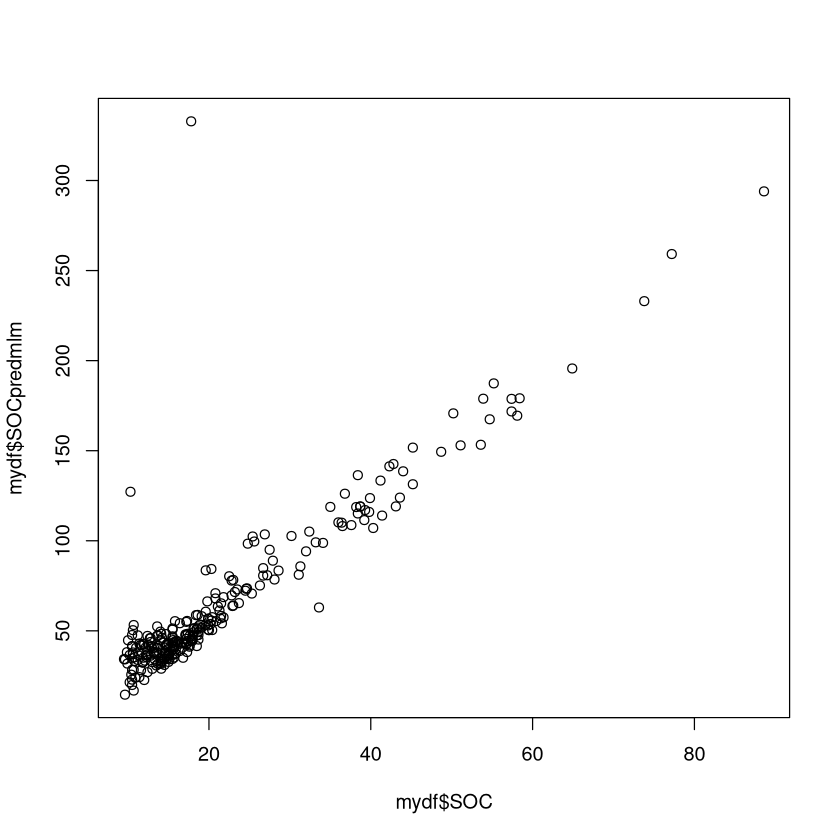

In [39]:
plot(mydf$SOC,mydf$SOCpredmlm)

In [40]:
## exporte mydata qui est un objet sf dans R en une fichier SIG shapefile lisible par QGIS
st_write(mydf, "newptsampleFenayL93.shp", delete_layer = TRUE)

## Allez ouvrir cette nouvelle couche/carte avec QGIS
## Faire la carte des différences entre SOC mesuré et SOC prédit par le modèle multi-linéaire

Writing layer `newptsampleFenayL93' to data source 
  `newptsampleFenayL93.shp' using driver `ESRI Shapefile'
Writing 269 features with 5 fields and geometry type Point.
